<a href="https://colab.research.google.com/github/yh08037/Introduction-to-Intelligent-Systems/blob/master/HW5_1_B_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 5-1 K-means
## B) Clustering some real data
### 1. Clustering the students in 3 clusters
#### Loading data and Initialization

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math


name_file = "./grade_students.csv"

data = pd.read_csv(name_file)

x = np.asarray(data)

I, N = x.shape

K = 3  # given

y = np.zeros((I, 1))


#### Definition of distortion function

In [0]:
def distortion(x, mu):
    
    result = 0.
    
    _I = x.shape[0]
    _K = mu.shape[1]
    
    for i in range(_I):
        tmp = []
        for k in range(_K):
            tmp.append(np.linalg.norm(x[i]-mu[:, k]) ** 2)
        _argmin = np.argmin(tmp)
        for k in range(_K):
            if k == _argmin:
                result += tmp[_argmin]
    return result

#### Training the model

In [150]:
num_init = 5

J_list = []
Mu_list = []

while len(J_list) < num_init:

    mu = np.vstack([np.random.uniform(0, x[:, n].max(), (1, K)) for n in range(N)])

    J_previous = 0.
    J_present = 0.

    epsilon = 0.0001
    cnt = 0

    mu_list = []
    
    
    while cnt < 1 or abs(J_present - J_previous) > epsilon:
        for i in range(I):
            tmp = []
            for k in range(0, K):
                tmp.append(np.linalg.norm(x[i]-mu[:, k]))
            y[i] = np.argmin(tmp)

        for k in range(K):
            cnt1 = 0
            mu[:, k] = np.zeros(N)
            for i in range(I):
                if y[i, 0] == k:
                    mu[:, k] += x[i]
                    cnt1 += 1
            if cnt1 > 0:
                mu[:, k] /= cnt1

        bad_init = False

        J_previous = J_present
        J_present = distortion(x, mu)
        cnt += 1

        print('iteration', cnt)
        print("mu_k\n", mu)
        print('distortion\n', J_present)
        print()
        
        mu_list.append(mu.copy())
        
        for k in range(K):
            if (mu[:, k] == np.zeros(N)).all():
                break
        else:
            continue
        
        break
         
        
    else:
        J_list.append(J_present)
        Mu_list.append(copy.deepcopy(mu_list))
    
    print('-----------------------------------------------------')

iteration 1
mu_k
 [[5.00900901e-01 0.00000000e+00 0.00000000e+00]
 [7.42126126e+00 0.00000000e+00 0.00000000e+00]
 [5.21307207e+02 0.00000000e+00 0.00000000e+00]
 [5.31456216e+02 0.00000000e+00 0.00000000e+00]
 [5.67824324e+02 0.00000000e+00 0.00000000e+00]
 [5.14643063e+02 0.00000000e+00 0.00000000e+00]]
distortion
 49316864.2830631

-----------------------------------------------------
iteration 1
mu_k
 [[0.00000000e+00 5.00810957e-01 1.00000000e+00]
 [0.00000000e+00 7.42223824e+00 2.00000000e+00]
 [0.00000000e+00 5.21324563e+02 4.25000000e+02]
 [0.00000000e+00 5.31479185e+02 4.04000000e+02]
 [0.00000000e+00 5.67835826e+02 5.04000000e+02]
 [0.00000000e+00 5.14660840e+02 4.16000000e+02]]
distortion
 41355355.741411544

-----------------------------------------------------
iteration 1
mu_k
 [[5.00900901e-01 0.00000000e+00 0.00000000e+00]
 [7.42126126e+00 0.00000000e+00 0.00000000e+00]
 [5.21307207e+02 0.00000000e+00 0.00000000e+00]
 [5.31456216e+02 0.00000000e+00 0.00000000e+00]
 [5.67

In [151]:
Mu_optimal = Mu_list[np.argmin(J_list)]  # trace of all steps of updating mu
mu_optimal = Mu_optimal[-1]              # converged mu value
print(mu_optimal)

[[4.71982759e-01 7.26826609e-01 2.52148997e-01]
 [6.92974138e+00 8.66194111e+00 6.60816619e+00]
 [5.21748707e+02 4.64484188e+02 5.95224928e+02]
 [5.35351724e+02 4.91586696e+02 5.77361032e+02]
 [5.69915517e+02 5.41398582e+02 5.99065903e+02]
 [5.20566810e+02 4.57386041e+02 5.80020057e+02]]


### 2. Interpreting results
As follows, we can cluster the students in three clusters, that is weak, average and gifted. Each of these are cluster 0, cluster 1 and cluster 2. The students of 'weak' cluster tend to absent, get free lunch more, and the scores of all subjects are lower. In contrast, The studernts of 'gifted' cluster have a tendency to get higher scores in exams,  less free lunch and absent.

In [152]:
cluster = [x[(y==k)[:,0]] for k in range(K)]
mean = [np.mean(cluster[k], axis=0) for k in range(K)]

for k in range(K):
    print('cluster %d\n' %k, cluster[k])
    print('freelunch\tabsent\t\treadscore\tmathscore\tlisteningscore\twordscore')
    for num in mean[k]:
        print('%f\t' %num, end='')
    print()
    print()

cluster 0
 [[  0  12 451 507 584 436]
 [  1   4 483 526 529 486]
 [  1   2 433 463 504 426]
 ...
 [  1  22 438 454 529 436]
 [  0   4 478 532 548 481]
 [  1  10 492 479 531 481]]
freelunch	absent		readscore	mathscore	listeningscore	wordscore
0.726827	8.661941	464.484188	491.586696	541.398582	457.386041	

cluster 1
 [[  1  24 590 578 580 551]
 [  1   2 564 520 606 577]
 [  0   7 629 592 685 577]
 ...
 [  0   6 629 545 546 601]
 [  1   1 629 549 601 601]
 [  0   7 579 578 625 536]]
freelunch	absent		readscore	mathscore	listeningscore	wordscore
0.252149	6.608166	595.224928	577.361032	599.065903	580.020057	

cluster 2
 [[  1   9 516 578 601 493]
 [  1  15 516 505 556 536]
 [  1  11 503 505 541 506]
 ...
 [  1  10 488 545 584 536]
 [  1   9 487 523 574 493]
 [  1   3 487 515 556 506]]
freelunch	absent		readscore	mathscore	listeningscore	wordscore
0.471983	6.929741	521.748707	535.351724	569.915517	520.566810	



#### 1. Calculate basis of P-dimensional hyperplane (PCA)

In [153]:
P = 3  # target dimension

# compute centroid of data

centroid = np.zeros(N)

for i in range(I):
    centroid += x[i]
centroid = centroid / I


# compute x_tilde : translate x so that the centroid is origin

x_tilde = np.empty(x.shape)

for i in range(I):
    x_tilde[i] = x[i] - centroid
    

# compute sigma : covariance matrix
    
sigma = np.zeros((N, N))

for i in range(I):
    sigma += np.matmul(x_tilde[i].reshape(-1, 1), x_tilde[i].reshape(1, -1))
sigma = sigma / I


# get eigenvalues, eigenvectors of sigma

eigvals, eigvecs = np.linalg.eig(sigma)


# get u : P pricipal eigenvectors
#       : eigenvectors correspoding to the P highest eigenvalues

u = eigvecs[:, eigvals.argsort()[-P:]]


# print principal axes of the data

print('Principal axes of the data')
for p in range(P):
    print(' u%d : ' %(p+1), u[:, p], '\tnorm : ', np.linalg.norm(u[:, p]))

Principal axes of the data
 u1 :  [-0.00251623  0.02023533  0.07220269 -0.63661201  0.7674375   0.01165359] 	norm :  1.0
 u2 :  [ 0.00138292 -0.00722878  0.27338119 -0.64027325 -0.56340494  0.44478488] 	norm :  0.9999999999999999
 u3 :  [ 0.00227784  0.01009142 -0.62774627 -0.42499108 -0.28483378 -0.58658324] 	norm :  1.0


#### 2. Project dataset, centroids onto P-dimension

In [0]:
# compute x_proj : project x_tilde onto u

x_proj = np.empty((I, P))

for i in range(I):
    x_proj[i] = np.asarray([np.dot(u[:, p], x_tilde[i]) for p in range(P)])

#### 3. Plot data and trained result

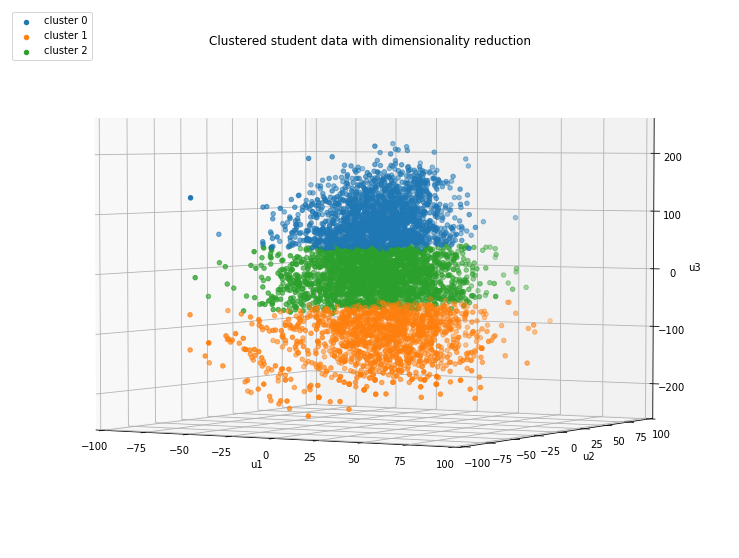

In [155]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13, 10))

ax = fig.add_subplot(111, projection='3d') # Axe3D object

ax.scatter(x_proj[(y==0)[:,0]][:,0], x_proj[(y==0)[:,0]][:,1], x_proj[(y==0)[:,0]][:,2], label='cluster 0')
ax.scatter(x_proj[(y==1)[:,0]][:,0], x_proj[(y==1)[:,0]][:,1], x_proj[(y==1)[:,0]][:,2], label='cluster 1')
ax.scatter(x_proj[(y==2)[:,0]][:,0], x_proj[(y==2)[:,0]][:,1], x_proj[(y==2)[:,0]][:,2], label='cluster 2')
           
ax.set_xlabel('u1')
ax.set_ylabel('u2')
ax.set_zlabel('u3')

plt.xlim(-100, 100)
plt.ylim(-100, 100)
ax.set_zlim(-250, 250)

ax.view_init(3,300)

plt.legend(loc='upper left', fancybox=True)

plt.title('Clustered student data with dimensionality reduction')

plt.show()